In [24]:
#Data set which I have choosen contains Age, Sex, BMI, Smoker/Non-Smoker and Insurance Charges.
#Here the task is to predict insurance charges based on Age, BMI, Smoker/Non-Smoker.
#Reason to Choose Linear Regression Alg : There is a strong corelation between variables in the dataset, Linear Regression Alg will predict the value of 
#dependent variable based on value of independent variables.
#This dataset has a strong corelation between dependent variable - insurances charges and independent variables - Age, Sex, BMI, Smoker/Non-Smoker
#Using Linear Regression Alg - I want to predict Insurance Charges which is a dependent variable is based on value of independent variable that is Age, BMI
#Smoker/Non-Smoker

import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as pt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
import torch

In [30]:
df= pd.read_csv("C:\\PythonDev\\insurance.csv")
# Insurance chargers related to BMI, sex, smoker/non-smoker and Region

df.head()
print(df.head())
print("Shape", df.shape)

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
Shape (1338, 7)


In [31]:
print('Rows and columns in the dataset : ', df.shape)

Rows and columns in the dataset :  (1338, 7)


In [32]:
df.describe()


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [33]:
corr_df=df.corr()
df.corr()

C:\Users\Puneeth\AppData\Local\Temp\ipykernel_27184\2602011908.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_df=df.corr()
C:\Users\Puneeth\AppData\Local\Temp\ipykernel_27184\2602011908.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [34]:
corr_list=corr_df.charges
print(corr_list)

age         0.299008
bmi         0.198341
children    0.067998
charges     1.000000
Name: charges, dtype: float64


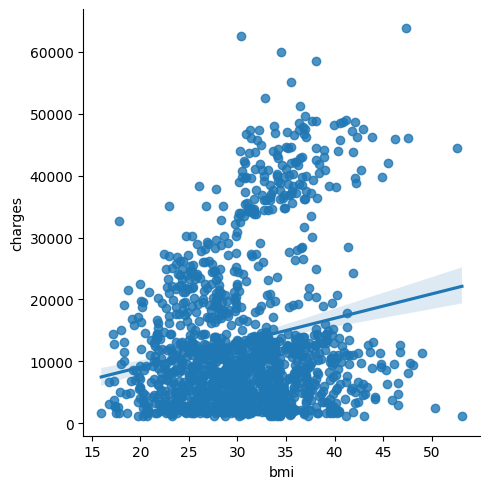

In [35]:
#This scatter plot to show the relation of bmi & charges 
sb.lmplot(x='bmi',y='charges',data=df)

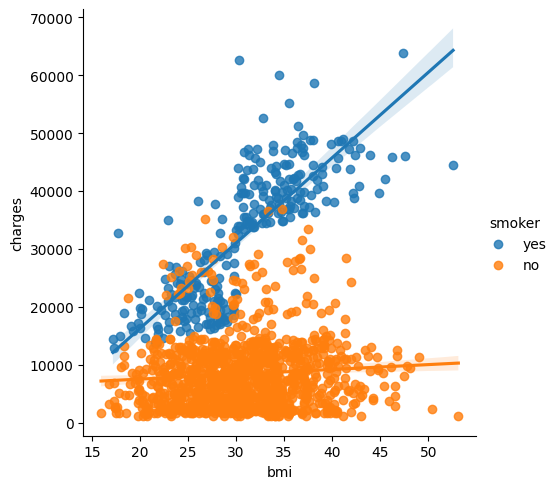

In [36]:
#This scatter plot to show the relation of bmi & charges against smoker & non smoker. 
#With this plot we can see that smokers with high bmi values are charged more.
sb.lmplot(x='bmi',y='charges',hue='smoker',data=df)

<Axes: xlabel='age', ylabel='charges'>

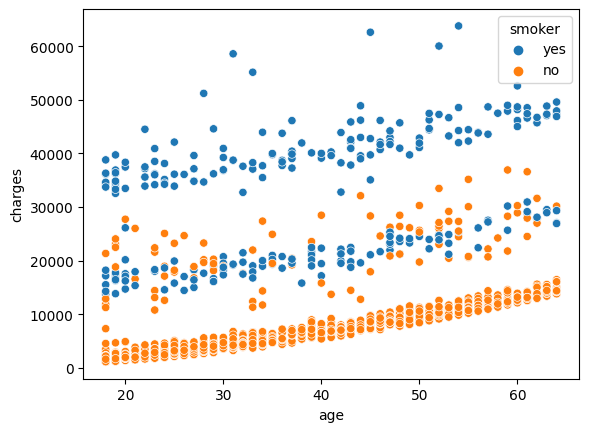

In [37]:
# This graph shows charges are high for smokers then non smokers
sb.scatterplot(x='age',y='charges',data=df,hue='smoker')

<Axes: xlabel='bmi', ylabel='charges'>

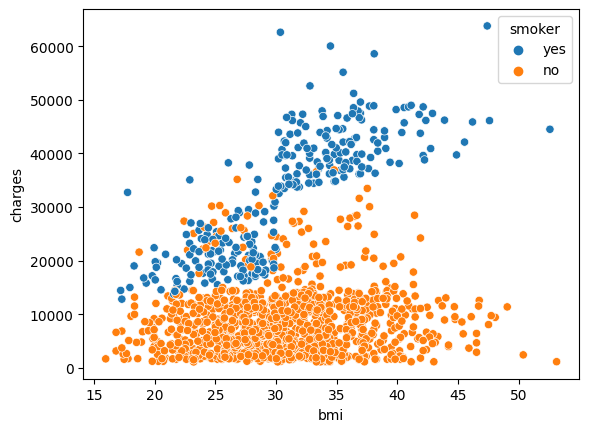

In [38]:
# this graph shows that smokers chargers are more
sb.scatterplot(x='bmi',y='charges',data=df,hue='smoker')

In [39]:
#Encoding categorical variables to numerical values
lencoder = LabelEncoder()

df[['sex','smoker','region']] = df[['sex','smoker','region']].apply(lambda col: lencoder.fit_transform(col))
df.head()




,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [43]:
#Reason to Choose Linear Regression Alg : There is a strong corelation between variables in the dataset, Linear Regression Alg will predict the value of 
#dependent variable based on value of independent variables.
#This dataset has a strong corelation between dependent variable - insurances charges and independent variables - Age, Sex, BMI, Smoker/Non-Smoker
#Using Linear Regression Alg - I want to predict Insurance Charges which is a dependent variable is based on value of independent variable that is Age, BMI
#Smoker/Non-Smoker


#Target variable is Charges - Y & Features are Age,Sex, Smoker, BMI - X
X = df[['age','sex','bmi','children','smoker','region']]
y = df['charges']

#Spliting the data for training(80%) & testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,)

#Applying Linear Regression ML Algorithm
regression_model = LinearRegression()

regression_model.fit(X_train, y_train)
acc=regression_model.score(X_test, y_test)
prd = regression_model.predict(X_test)
print("Accuracy is: ", acc)
#print("Predictions are: ", regression_model.predict(X_test))
print("Prediction is: ", prd[10])

Accuracy is:  0.7319146864611706
Prediction is:  7360.061171300844
